In [1]:
####  Canny 边缘检测

###  Canny 边缘检测是一种非常流行的边缘检测算法, 有以下几个步骤：
#### 1. 由于边缘检测很容易受到噪声影响，所以第一步是使用 5x5 的高斯滤波器去除噪声
#### 2. 对平滑后的图像使用 Sobel 算子计算水平方向和竖直方向的一阶导数（图像梯度）（Gx 和 Gy）。根据得到的这两幅梯度图（Gx 和 Gy）找到边界的梯度和方向，公式如下:
![jupyter](./gradient.png)
####     梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。
#### 3. 非极大值抑制. 在获得梯度的方向和大小之后，应该对整幅图像做一个扫描，去除那些非边界上的点。对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的如下图所示：
![jupyter](./gradient1.png)
####    现在你得到的是一个包含“窄边界”的二值图像。
#### 4. 滞后阈值. 现在要确定那些边界才是真正的边界。这时我们需要设置两个阈值：minVal 和 maxVal。当图像的灰度梯度高于 maxVal 时被认为是真的边界，那些低于 minVal 的边界会被抛弃。如果介于两者之间的话，就要看这个点是否与某个被确         定为真正的边界点相连，如果是就认为它也是边界点，如果不是就抛弃。如下图:
![jupyter](./value-select.jpg)
####    A 高于阈值 maxVal 所以是真正的边界点，C 虽然低于 maxVal 但高于minVal 并且与 A 相连，所以也被认为是真正的边界点。而 B 就会被抛弃，因为他不仅低于 maxVal 而且不与真正的边界点相连。所以选择合适的 maxVal和 minVal 对于能否得到好的结果非常重要。

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

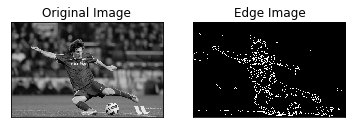

In [3]:

img = cv2.imread('f:/opencv/img/messi5.jpg', 0)
edges = cv2.Canny(img, 100, 200)   ### 100, 200 minVal, maxVal

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
def doNothing(x):
    pass

In [5]:
cv2.namedWindow('Edge-Image')
cv2.createTrackbar('min-value', 'Edge-Image', 0, 255, doNothing)
cv2.createTrackbar('max-value', 'Edge-Image', 1, 255, doNothing)
img = cv2.imread('f:/opencv/img/messi5.jpg', 0)
cv2.imshow('img', img)

while (True):
    min_val = cv2.getTrackbarPos('min-value', 'Edge-Image')
    max_val = cv2.getTrackbarPos('max-value', 'Edge-Image')
    if (min_val >= max_val):
        raise ValueError('max value must bigger than min value')
        break

    img = cv2.imread('f:/opencv/img/messi5.jpg', 0)
    edges = cv2.Canny(img, min_val, max_val)
    cv2.imshow('Edge-Image', edges)
    
    if cv2.waitKey(5) == ord('q'):
        break

cv2.destroyAllWindows()

ValueError: max value must bigger than min value

In [ ]:
### 图像金字塔（高斯金字塔， 拉普拉斯金字塔）
#### 一般情况下，我们要处理是一副具有固定分辨率的图像。但是有些情况下，我们需要对同一图像的不同分辨率的子图像进行处理。比如，我们要在一幅图像中查找某个目标，比如脸，我们不知道目标在图像中的尺寸大小。这种情况下，
#### 我们需要创建创建一组图像，这些图像是具有不同分辨率的原始图像。我们把这组图像叫做图像金字塔（简单来说就是同一图像的不同分辨率的子图集合）。如果我们把最大的图像放在底部，最小的放在顶部，看起来像一座金字塔，故而得名图像金字塔。

In [6]:
### 高斯金字塔
#### 高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值。这样操作一次一个 MxN 的图像就变成了一个 M/2xN/2 的图像

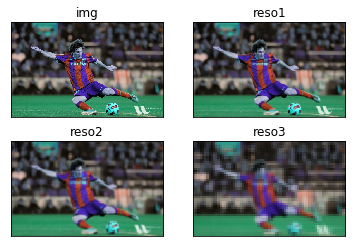

In [21]:
img = cv2.imread('f:/opencv/img/messi5.jpg')
reso1 = cv2.pyrDown(img)
reso2 = cv2.pyrDown(reso1)
reso3 = cv2.pyrDown(reso2)


##plt.figure(figsize=(20, 16))
plt.subplot(221),plt.imshow(img), plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(reso1), plt.title('reso1'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(reso2), plt.title('reso2'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(reso3), plt.title('reso3'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imshow('img', img)
#cv2.imshow('reso1', reso1)
#cv2.imshow('reso2', reso2)
#cv2.imshow('reso3', reso3)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [22]:
### 函数 cv2.pyrUp() 从一个低分辨率小尺寸的图像向下构建一个金子塔（尺寸变大，但分辨率不会增加）

h_reso1 = cv2.pyrUp(reso3)
h_reso2 = cv2.pyrUp(h_reso1)
h_reso3 = cv2.pyrUp(h_reso2)
cv2.imshow('img', img)
cv2.imshow('h_reso1', h_reso1)
cv2.imshow('h_reso2', h_reso2)
cv2.imshow('h_reso3', h_reso3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 拉普拉斯金字塔
#### 拉普拉斯金字塔可以有高斯金字塔计算得来，公式如下:
![jupyter](./Laplacian-reso.png)    
#### 相邻两层高斯塔图像相差， 拉普拉金字塔的图像看起来就像边界图，其中很多像素都是 0。他们经常被用在图像压缩中

In [49]:
### 注意 pyrDown 长，宽/2  pyrUp 长, 宽 *2   在/2时有可能会因为产生小数转化为整形时值+1， 而*2后会导致与之前的长宽不同值 。。从而导致 cv2.subtract运行出错
img = cv2.imread('f:/opencv/img/messi5.jpg')
img = cv2.resize(img, (600, 400))
d_reso1 = cv2.pyrDown(img, cv2.BORDER_REFLECT)
d_reso2 = cv2.pyrDown(d_reso1, cv2.BORDER_REFLECT)
d_reso3 = cv2.pyrDown(d_reso2, cv2.BORDER_REFLECT)

print("img: {}  d_reso1: {}  d_reso2: {} d_reso3: {}".format(img.shape, d_reso1.shape, d_reso2.shape, d_reso3.shape))

u_reso3 = cv2.pyrUp(d_reso3, cv2.BORDER_REFLECT)
u_reso2 = cv2.pyrUp(d_reso2, cv2.BORDER_REFLECT)
u_reso1 = cv2.pyrUp(d_reso1, cv2.BORDER_REFLECT)
print("img: {}  u_reso1: {}  u_reso2: {} u_reso3: {}".format(img.shape, u_reso1.shape, u_reso2.shape, u_reso3.shape))

lp_reso3 = cv2.subtract(d_reso1, cv2.pyrUp(d_reso2))
lp_reso2 = cv2.subtract(d_reso2, u_reso3)
lp_reso1 = cv2.subtract(img, u_reso1)

cv2.imshow('lp_reso1', lp_reso1)
cv2.imshow('lp_reso2', lp_reso2)
cv2.imshow('lp_reso3', lp_reso3)
cv2.waitKey(0)
cv2.destroyAllWindows()


img: (400, 600, 3)  d_reso1: (200, 300, 3)  d_reso2: (100, 150, 3) d_reso3: (50, 75, 3)
img: (400, 600, 3)  u_reso1: (400, 600, 3)  u_reso2: (200, 300, 3) u_reso3: (100, 150, 3)


In [47]:
cv2.subtract?

Docstring:
subtract(src1, src2[, dst[, mask[, dtype]]]) -> dst
.   @brief Calculates the per-element difference between two arrays or array and a scalar.
.   
.   The function subtract calculates:
.   - Difference between two arrays, when both input arrays have the same size and the same number of
.   channels:
.       \f[\texttt{dst}(I) =  \texttt{saturate} ( \texttt{src1}(I) -  \texttt{src2}(I)) \quad \texttt{if mask}(I) \ne0\f]
.   - Difference between an array and a scalar, when src2 is constructed from Scalar or has the same
.   number of elements as `src1.channels()`:
.       \f[\texttt{dst}(I) =  \texttt{saturate} ( \texttt{src1}(I) -  \texttt{src2} ) \quad \texttt{if mask}(I) \ne0\f]
.   - Difference between a scalar and an array, when src1 is constructed from Scalar or has the same
.   number of elements as `src2.channels()`:
.       \f[\texttt{dst}(I) =  \texttt{saturate} ( \texttt{src1} -  \texttt{src2}(I) ) \quad \texttt{if mask}(I) \ne0\f]
.   - The reverse difference betw